<a href="https://colab.research.google.com/github/souban1234/KERAS_SERIES_WITH_BACKEND_TENSORFLOW/blob/main/Butterfly%20Classification%20AI%20Challenge/Butterfly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!pip install -U efficientnet
import tensorflow as tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator #generating images from training data
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation, BatchNormalization
import numpy as np
from keras.optimizers import Adam,RMSprop,SGD
from tensorflow.keras.applications import VGG19
import efficientnet.keras as efn

     |████████████████████████████████| 51kB 2.3MB/s 


In [ ]:

train_dir = r'/gdrive/My Drive/Butterfly/DATA/TRAIN'
test_dir =r'/gdrive/My Drive/Butterfly/DATA/TEST'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255.,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      validation_split=0.2
       )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(128,128),
        batch_size=32,
        class_mode='categorical',
        subset='training')
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(128,128),
    batch_size=20,
    class_mode='categorical',
    subset='validation')

test_generator =test_datagen.flow_from_directory(test_dir,target_size =(128,128), batch_size=20,class_mode="categorical")


Found 3600 images belonging to 50 classes.
Found 878 images belonging to 50 classes.
Found 500 images belonging to 1 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50

conv_base = efn.EfficientNetB7(weights='imagenet',
                  include_top=False,
                  input_shape=(128,128,3))
conv_base.summary()

Model: "efficientnet-b7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 64, 64, 64)   1728        input_4[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 64, 64, 64)   256         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 64, 64, 64)   0           stem_bn[0][0]                    
____________________________________________________________________________________

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(1e-6)))
model.add(Dropout(0.5))
model.add(Dense(2048,activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(1e-6)))
model.add(Dropout(0.3))
model.add(Dense(4096,activation="relu"))
model.add(Dropout(0.4))
model.add(layers.Dense(50, activation='sigmoid'))
#model.layers[0].trainable=False
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b7 (Functional) (None, 4, 4, 2560)        64097680  
_________________________________________________________________
flatten_5 (Flatten)          (None, 40960)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 1024)              41944064  
_________________________________________________________________
dropout_12 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 2048)              2099200   
_________________________________________________________________
dropout_13 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 4096)             

In [ ]:
model.compile(optimizer=Adam(lr=1e-5,decay=1e-6),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
filepath="weights-improvement-{epoch:02d}-{accuracy:.6f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True,save_freq='epoch', mode='max')
callbacks_list = [checkpoint]
history=model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples //256,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples //128,
    epochs = 25,
    
    )

Epoch 1/25
14/14 [==============================] - 10s 713ms/step - loss: 0.6201 - accuracy: 0.7790 - val_loss: 0.6437 - val_accuracy: 0.8917
Epoch 2/25
14/14 [==============================] - 9s 646ms/step - loss: 0.5664 - accuracy: 0.8241 - val_loss: 0.5002 - val_accuracy: 0.8417
Epoch 3/25
14/14 [==============================] - 9s 668ms/step - loss: 0.6147 - accuracy: 0.7969 - val_loss: 0.5284 - val_accuracy: 0.8750
Epoch 4/25
14/14 [==============================] - 10s 690ms/step - loss: 0.6139 - accuracy: 0.8058 - val_loss: 0.3961 - val_accuracy: 0.9000
Epoch 5/25
14/14 [==============================] - 9s 640ms/step - loss: 0.5743 - accuracy: 0.8102 - val_loss: 0.3536 - val_accuracy: 0.9250
Epoch 6/25
14/14 [==============================] - 10s 701ms/step - loss: 0.5764 - accuracy: 0.8147 - val_loss: 0.3444 - val_accuracy: 0.9500
Epoch 7/25
14/14 [==============================] - 9s 649ms/step - loss: 0.6424 - accuracy: 0.8079 - val_loss: 0.4814 - val_accuracy: 0.8917
Epo

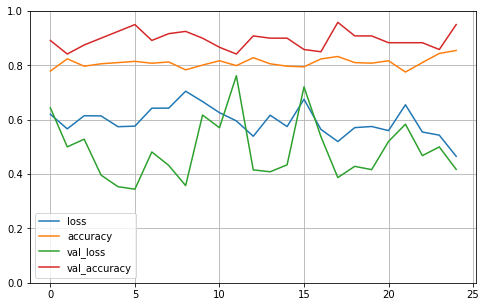

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.compile(optimizer=SGD(1e-6),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history1=model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples //256,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples //128,
    epochs = 100
    )

Epoch 1/100
14/14 [==============================] - 8s 590ms/step - loss: 0.3493 - accuracy: 0.8906 - val_loss: 0.8279 - val_accuracy: 0.7917
Epoch 2/100
14/14 [==============================] - 8s 546ms/step - loss: 0.4893 - accuracy: 0.8420 - val_loss: 0.9056 - val_accuracy: 0.8083
Epoch 3/100
14/14 [==============================] - 8s 572ms/step - loss: 0.3854 - accuracy: 0.8750 - val_loss: 1.1781 - val_accuracy: 0.7167
Epoch 4/100
14/14 [==============================] - 8s 550ms/step - loss: 0.4806 - accuracy: 0.8438 - val_loss: 0.9709 - val_accuracy: 0.7333
Epoch 5/100
14/14 [==============================] - 8s 567ms/step - loss: 0.4477 - accuracy: 0.8504 - val_loss: 1.0308 - val_accuracy: 0.7917
Epoch 6/100
14/14 [==============================] - 8s 561ms/step - loss: 0.4386 - accuracy: 0.8482 - val_loss: 1.2997 - val_accuracy: 0.7500
Epoch 7/100
14/14 [==============================] - 9s 641ms/step - loss: 0.4337 - accuracy: 0.8482 - val_loss: 0.7686 - val_accuracy: 0.8083

In [ ]:
model.evaluate_generator(test_generator,steps=50)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[679.9144287109375, 0.019999999552965164]

In [ ]:
from keras.preprocessing import image
import os

# image folder
folder_path = r'/gdrive/My Drive/Butterfly/DATA/TEST/New folder'

# load all images into a list
images = []
img_name=[]
for img in os.listdir(folder_path):
    img_name.append(img)
    img = os.path.join(folder_path, img)
    img = image.load_img(img, target_size=(128,128,3),grayscale=False)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)
    
images = np.vstack(images)
img_name=np.array(img_name)
classes = model.predict_classes(images, batch_size=256)
print(classes)

[ 0  0 15  0  0  0  0  0 18 33  0  0  0  2  0  3 15 35  1  2  0 41 21  0
  0  0 26  0 15  0  0  0  0  0  0  0  2 33  0 15  0 24  7 24 18  0  0  0
  2  0  0 18  0  0 35  0  0  0  0  0 33  0  0  0 41  0  0  0 27  0  0  0
  0 13 24 15  0  0  0 15  0  0 18  0  0  0  0 24  1  0  0  0  0  0  0  0
  0  0  0  0 15  0 35  0  0  1  2  0  0  1  0 15 21  0  0  0  0  0 24  0
  0  0 24  0  0  0  1 24  0  0  0  0  0  1  0  0  0  0  0  0  2 44  0 33
  0  0  0  0  0 33  5  0  0 15  0  0  5  0  0  0 15  0  0  0  0  0  0  0
  0  1 15  0  0  0  0 15  0  0  0  0  1  0  0 41  0  0  0 18  5  0  0 15
  0  1  0  0 15 24  0  0 24  0  0 24  0 49 15  3  0  0  0  0  5  0  0 44
 15  0 42  0  0 33 15  0  0  0 18  0  0  0  0  2 24  0 18  0 18 15 18  0
  0 33  0  0 33  0  0  0  0 24  0  0  0  0  0  0 25  0  0  2  0  0 41  2
  0  0 18 24  0 24  0  0  0  5  0  0 41 33  0 24  0  0  0  0 24 33  0  2
 15  2  1 15  0  0 24  0  0  0  0  0  0  0 41  0 24  0 33 24  0 41  0  0
  0  0  0  0  2  0 18 41  0  0  0 21  0  0 15  0  0

In [ ]:
classes_name=train_generator.class_indices
print(classes_name)
inverted_classes = dict(map(reversed, classes_name.items()))
print(inverted_classes)

{'adonis': 0, 'american snoot': 1, 'an 88': 2, 'banded peacock': 3, 'beckers white': 4, 'black hairstreak': 5, 'cabbage white': 6, 'chestnut': 7, 'clodius parnassian': 8, 'clouded sulphur': 9, 'copper tail': 10, 'crecent': 11, 'crimson patch': 12, 'eastern coma': 13, 'gold banded': 14, 'great eggfly': 15, 'grey hairstreak': 16, 'indra swallow': 17, 'julia': 18, 'large marble': 19, 'malachite': 20, 'mangrove skipper': 21, 'metalmark': 22, 'monarch': 23, 'morning cloak': 24, 'orange oakleaf': 25, 'orange tip': 26, 'orchard swallow': 27, 'painted lady': 28, 'paper kite': 29, 'peacock': 30, 'pine white': 31, 'pipevine swallow': 32, 'purple hairstreak': 33, 'question mark': 34, 'red admiral': 35, 'red spotted purple': 36, 'scarce swallow': 37, 'silver spot skipper': 38, 'sixspot burnet': 39, 'skipper': 40, 'sootywing': 41, 'southern dogface': 42, 'straited queen': 43, 'two barred flasher': 44, 'ulyses': 45, 'viceroy': 46, 'wood satyr': 47, 'yellow swallow tail': 48, 'zebra long wing': 49}
{

In [ ]:

prediction_classes = [ inverted_classes.get(item,item) for item in classes ]
prediction_classes

['adonis',
 'adonis',
 'great eggfly',
 'adonis',
 'adonis',
 'adonis',
 'adonis',
 'adonis',
 'julia',
 'purple hairstreak',
 'adonis',
 'adonis',
 'adonis',
 'an 88',
 'adonis',
 'banded peacock',
 'great eggfly',
 'red admiral',
 'american snoot',
 'an 88',
 'adonis',
 'sootywing',
 'mangrove skipper',
 'adonis',
 'adonis',
 'adonis',
 'orange tip',
 'adonis',
 'great eggfly',
 'adonis',
 'adonis',
 'adonis',
 'adonis',
 'adonis',
 'adonis',
 'adonis',
 'an 88',
 'purple hairstreak',
 'adonis',
 'great eggfly',
 'adonis',
 'morning cloak',
 'chestnut',
 'morning cloak',
 'julia',
 'adonis',
 'adonis',
 'adonis',
 'an 88',
 'adonis',
 'adonis',
 'julia',
 'adonis',
 'adonis',
 'red admiral',
 'adonis',
 'adonis',
 'adonis',
 'adonis',
 'adonis',
 'purple hairstreak',
 'adonis',
 'adonis',
 'adonis',
 'sootywing',
 'adonis',
 'adonis',
 'adonis',
 'orchard swallow',
 'adonis',
 'adonis',
 'adonis',
 'adonis',
 'eastern coma',
 'morning cloak',
 'great eggfly',
 'adonis',
 'adonis',
 '

In [ ]:
import pandas as pd
df4 = pd.DataFrame({'filename':img_name,'class':prediction_classes})
df4.sort_values("filename",ascending=True,inplace=True)
df4.reset_index(drop=True,level=False,inplace=True)

In [ ]:
df4

,filename,class
0,000.jpg,red admiral
1,001.jpg,straited queen
2,002.jpg,ulyses
3,003.jpg,pipevine swallow
4,004.jpg,paper kite
...,...,...
505,495.jpg,crimson patch
506,496.jpg,red spotted purple
507,497.jpg,paper kite
508,498.jpg,paper kite


In [ ]:
df4.to_csv("output.csv",index=False)

In [ ]:
from google.colab import files
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>